In [1]:
import numpy as np
from sklearn.datasets import load_digits
import gtda.homology
import gtda.diagrams
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from topconv import topfiltlearn, filters2diagrams, testmodels, diagrams_2_images, diagrams_2_tpers, concatenate_top_features

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
dev = pd.read_csv('data.csv').to_numpy()

In [47]:
data = dev[:,:-1]
labels = dev[:,-1]
data = np.reshape(data,(len(data),32,32)).astype(np.float32)
idxs = np.random.choice(range(len(data)),2500)    
X = data[idxs]
y = labels[idxs]


In [48]:
1.0/len(np.unique(y))

0.021739130434782608

kNN Results:  [0.13189448 0.12965186 0.13565426]
Gradient Boosting Results:  [0.14388489 0.18367347 0.17046819]


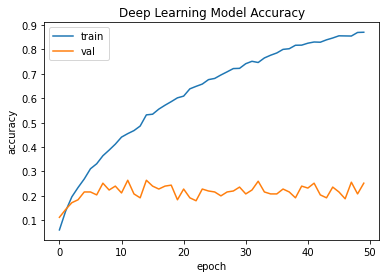

In [49]:
# Baseline : Not Using any filters
D = filters2diagrams(X,[])
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)
#topfiltlearn(X,y,[],pool=True)

kNN Results:  [0.09592326 0.08403361 0.08643457]
Gradient Boosting Results:  [0.08992806 0.09843938 0.10684274]


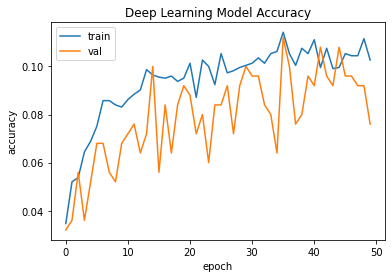

In [50]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

kNN Results:  [0.10311751 0.10084034 0.07923169]
Gradient Boosting Results:  [0.13309353 0.15846339 0.1392557 ]


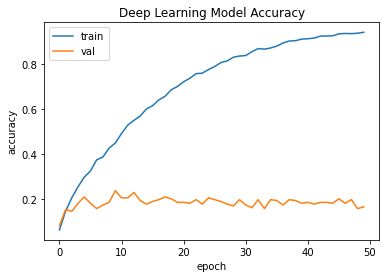

In [51]:
# Using some preset 4x4 filters
from scipy.ndimage import gaussian_filter, sobel, uniform_filter, laplace
A = np.zeros((4,4))
filters = [gaussian_filter(A,sigma=1), sobel(A),uniform_filter(A),laplace(A)]
D = filters2diagrams(X,filters,pool=True)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)


kNN Results:  [0.06714628 0.06962785 0.05642257]
Gradient Boosting Results:  [0.07553957 0.06722689 0.07082833]


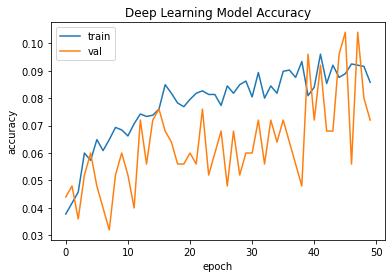

In [52]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

In [54]:
#Using PCA eigenfilters
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA 
patches = []
for im in X:
    patches.extend(extract_patches_2d(im,(4,4)))
#print(np.shape(patches))
patches = np.reshape(patches,(len(patches),16))
pca = PCA(n_components=16)
pca.fit(patches)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)
#M = np.asarray(pca.components_[:10]).T
#for i in range(16):
#    weights = np.random.uniform(size=10)
#    weights = weights/sum(weights)
#    filters.append(np.reshape(np.matmul(M,weights),(4,4)))
filters = []
for i in range(4):
    filters.append(np.reshape(pca.components_[i],(4,4)))
print(np.shape(filters))

(4, 4, 4)


(2500, 1000)
kNN Results:  [0.23621103 0.22809124 0.22208884]
Gradient Boosting Results:  [0.20503597 0.23169268 0.22569028]


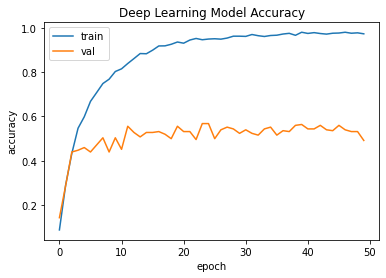

In [55]:
#Turn data into diagrams
D = filters2diagrams(X,filters)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
print(np.shape(con_images))
#Test these features on the learning task
testmodels(con_images,y)

kNN Results:  [0.34532374 0.34093637 0.33253301]
Gradient Boosting Results:  [0.26618705 0.25810324 0.26890756]


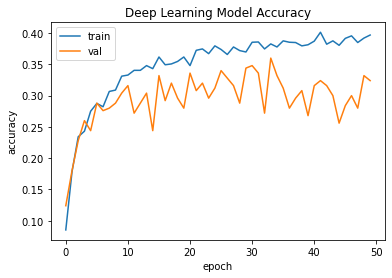

In [56]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

kNN Results:  [0.27218225 0.27971188 0.25930372]
Gradient Boosting Results:  [0.1558753  0.1512605  0.15606242]


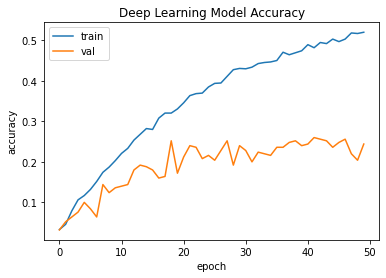

In [57]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(16):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

D = filters2diagrams(X,filters,pool=True)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)

kNN Results:  [0.38369305 0.37454982 0.39015606]
Gradient Boosting Results:  [0.22302158 0.21728691 0.20648259]


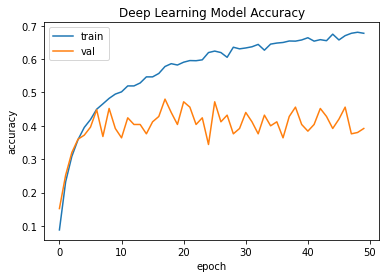

In [58]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

kNN Results:  [0.43285372 0.42496999 0.39855942]
Gradient Boosting Results:  [0.19304556 0.20168067 0.18847539]


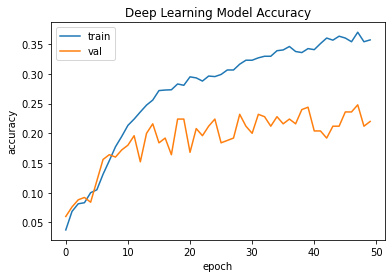

In [59]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(50):
    filters.append(np.reshape(sample_spherical(1,9),(3,3)))

D = filters2diagrams(X,filters,pool=True)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)

kNN Results:  [0.48920863 0.4789916  0.45258103]
Gradient Boosting Results:  [0.26978417 0.27971188 0.25330132]


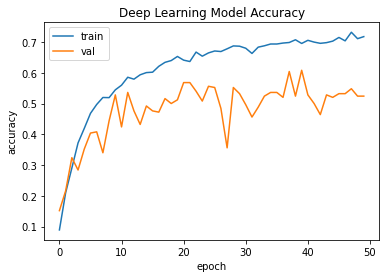

In [60]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)